# 기술통계

In [1]:
import pandas as pd
new_df = pd.read_csv('K-League-data2.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 100 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   666 non-null    int64  
 1   Rnd.         666 non-null    int64  
 2   대회           666 non-null    object 
 3   홈 득점         666 non-null    int64  
 4   홈 도움         666 non-null    int64  
 5   홈 슈팅         666 non-null    int64  
 6   홈 유효 슈팅      666 non-null    int64  
 7   홈 블락된슈팅      666 non-null    int64  
 8   홈 벗어난슈팅      666 non-null    int64  
 9   홈 PA내 슈팅     666 non-null    int64  
 10  홈 PA외 슈팅     666 non-null    int64  
 11  홈 프리킥 슈팅     666 non-null    int64  
 12  홈 프리킥 유효슈팅   666 non-null    int64  
 13  홈 프리킥 크로스    666 non-null    float64
 14  홈 오프사이드      666 non-null    int64  
 15  홈 코너킥        666 non-null    int64  
 16  홈 스로인        666 non-null    int64  
 17  홈 드리블        666 non-null    float64
 18  홈 패스         666 non-null    float64
 19  홈 키패스  

In [2]:
new_df.isnull().sum()

Unnamed: 0    0
Rnd.          0
대회            0
홈 득점          0
홈 도움          0
             ..
원정 소속 선수 수    0
원정 평균 나이      0
원정 용병 수       0
원정 평균 가치      0
원정 총 가치       0
Length: 100, dtype: int64

In [3]:
# 열이 많아서 슬라이싱 - 1

new_df[['홈 득점', '홈 도움', '홈 슈팅', '홈 유효 슈팅', '홈 블락된슈팅', '홈 벗어난슈팅',
       '홈 PA내 슈팅', '홈 PA외 슈팅', '홈 프리킥 슈팅', '홈 프리킥 유효슈팅', '홈 프리킥 크로스', '홈 오프사이드', '홈 코너킥',
       '홈 스로인', '홈 드리블', '홈 패스']].describe()

,홈 득점,홈 도움,홈 슈팅,홈 유효 슈팅,홈 블락된슈팅,홈 벗어난슈팅,홈 PA내 슈팅,홈 PA외 슈팅,홈 프리킥 슈팅,홈 프리킥 유효슈팅,홈 프리킥 크로스,홈 오프사이드,홈 코너킥,홈 스로인,홈 드리블,홈 패스
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,1.334835,0.810811,12.252252,4.237237,2.632132,5.382883,7.114114,5.138138,0.466967,0.145646,21.430480,1.435435,4.456456,20.153153,37.279279,81.400000
std,1.109312,0.899592,4.100545,2.232540,1.897712,2.383327,3.041400,2.539105,0.664654,0.381671,33.003666,1.345404,2.477337,5.782314,23.103660,6.236866
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,58.800000
25%,1.000000,0.000000,9.000000,3.000000,1.000000,4.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.000000,22.425000,77.700000
50%,1.000000,1.000000,12.000000,4.000000,2.000000,5.000000,7.000000,5.000000,0.000000,0.000000,0.000000,1.000000,4.000000,20.000000,37.500000,82.100000
75%,2.000000,1.000000,15.000000,6.000000,4.000000,7.000000,9.000000,7.000000,1.000000,0.000000,50.000000,2.000000,6.000000,24.000000,50.000000,86.300000
max,7.000000,5.000000,27.000000,13.000000,11.000000,15.000000,20.000000,16.000000,3.000000,2.000000,100.000000,9.000000,17.000000,43.000000,100.000000,94.300000


In [4]:
new_df[['홈 키패스', '홈 전방패스', '홈 후방패스', '홈 횡패스', '홈 공격진영 패스', '홈 수비진영 패스',
       '홈 중앙진영 패스', '홈 롱패스', '홈 중거리패스', '홈 단거리패스', '홈 크로스', '홈 탈압박', '홈 경합 지상', '홈 경합 공중',
       '홈 태클', '홈 클리어링', '홈 인터셉트', '홈 차단', '홈 획득',]].describe()

,홈 키패스,홈 전방패스,홈 후방패스,홈 횡패스,홈 공격진영 패스,홈 수비진영 패스,홈 중앙진영 패스,홈 롱패스,홈 중거리패스,홈 단거리패스,홈 크로스,홈 탈압박,홈 경합 지상,홈 경합 공중,홈 태클,홈 클리어링,홈 인터셉트,홈 차단,홈 획득
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,7.205706,66.982132,96.059910,89.821021,76.009309,78.145946,85.004505,57.268769,85.550000,85.319369,23.019820,2.657658,50.754354,50.286486,40.012763,26.791291,27.001502,25.303303,63.641141
std,2.942767,8.125974,2.522536,5.473711,8.739192,9.249853,5.780094,11.988154,6.217345,4.928914,9.954024,2.239746,10.453310,8.495448,18.129715,13.581278,9.513030,12.366261,18.278021
min,1.000000,42.100000,82.800000,64.800000,46.000000,43.800000,60.700000,23.100000,61.800000,65.200000,0.000000,0.000000,0.000000,23.800000,0.000000,2.000000,3.000000,5.000000,29.000000
25%,5.000000,61.325000,94.600000,86.800000,69.700000,72.200000,81.425000,49.200000,81.600000,82.700000,16.700000,1.000000,45.500000,44.700000,27.650000,16.000000,20.000000,16.000000,49.000000
50%,7.000000,67.200000,96.600000,90.950000,76.700000,79.050000,85.900000,56.400000,86.650000,85.800000,22.200000,2.000000,50.000000,50.000000,37.500000,25.000000,27.000000,21.000000,60.000000
75%,9.000000,73.000000,97.900000,94.200000,82.800000,85.500000,89.300000,64.375000,90.275000,88.800000,29.400000,4.000000,56.175000,56.175000,50.000000,36.000000,33.000000,34.000000,76.000000
max,18.000000,87.000000,100.000000,98.300000,97.800000,96.500000,97.100000,90.800000,96.800000,95.400000,62.500000,14.000000,90.900000,74.400000,100.000000,73.000000,64.000000,68.000000,124.000000


In [5]:
new_df[['홈 블락', '홈 볼미스', '홈 파울', '홈 피파울', '홈 경고', '홈 퇴장', '홈 경기결과', '홈 소속 선수 수', '홈 평균 나이', '홈 용병 수', '홈 평균 가치', '홈 총 가치', 
       '원정 득점', '원정 도움', '원정 슈팅', '원정 유효 슈팅', '원정 블락된슈팅', '원정 벗어난슈팅',]].describe()

,홈 블락,홈 볼미스,홈 파울,홈 피파울,홈 경고,홈 퇴장,홈 소속 선수 수,홈 평균 나이,홈 용병 수,홈 평균 가치,홈 총 가치,원정 득점,원정 도움,원정 슈팅,원정 유효 슈팅,원정 블락된슈팅,원정 벗어난슈팅
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,13.963964,6.663664,11.665165,11.331832,1.668168,0.028529,39.465465,24.897898,4.490991,350.744745,13.690135,1.192192,0.780781,10.669670,3.777778,2.325826,4.566066
std,9.593947,2.883362,3.914563,3.765627,1.230970,0.175396,5.310184,1.372379,1.284053,98.516184,3.593214,1.083991,0.896102,3.848899,2.091555,1.734348,2.280876
min,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,30.000000,22.600000,0.000000,228.000000,9.180000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,9.000000,9.000000,1.000000,0.000000,36.000000,23.900000,4.000000,287.000000,11.030000,0.000000,0.000000,8.000000,2.000000,1.000000,3.000000
50%,16.000000,6.000000,11.000000,11.000000,2.000000,0.000000,40.000000,24.800000,5.000000,322.000000,12.330000,1.000000,1.000000,10.000000,4.000000,2.000000,4.000000
75%,21.000000,8.750000,14.000000,14.000000,2.000000,0.000000,42.000000,25.900000,5.000000,376.000000,17.080000,2.000000,1.000000,13.000000,5.000000,3.000000,6.000000
max,40.000000,15.000000,27.000000,24.000000,7.000000,2.000000,52.000000,28.800000,7.000000,632.000000,22.180000,5.000000,5.000000,27.000000,11.000000,10.000000,14.000000


In [6]:
new_df[['원정 PA내 슈팅', '원정 PA외 슈팅', '원정 프리킥 슈팅', '원정 프리킥 유효슈팅', '원정 프리킥 크로스', '원정 오프사이드', '원정 코너킥',
       '원정 스로인', '원정 드리블', '원정 패스', '원정 키패스', '원정 전방패스', '원정 후방패스', '원정 횡패스', '원정 공격진영 패스', '원정 수비진영 패스',
       '원정 중앙진영 패스', '원정 롱패스', '원정 중거리패스',]].describe()

,원정 PA내 슈팅,원정 PA외 슈팅,원정 프리킥 슈팅,원정 프리킥 유효슈팅,원정 프리킥 크로스,원정 오프사이드,원정 코너킥,원정 스로인,원정 드리블,원정 패스,원정 키패스,원정 전방패스,원정 후방패스,원정 횡패스,원정 공격진영 패스,원정 수비진영 패스,원정 중앙진영 패스,원정 롱패스,원정 중거리패스
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,6.073574,4.596096,0.396396,0.133634,18.409910,1.381381,4.124625,19.821321,36.509610,80.619369,6.298799,65.913814,95.919820,89.426426,75.265315,77.317117,84.130931,55.515916,84.857357
std,2.830392,2.339060,0.638786,0.374179,32.113526,1.304203,2.302224,6.016736,25.077079,6.685329,2.912131,8.584786,2.615379,5.657260,8.781798,10.024347,6.185428,12.581637,6.448009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,53.500000,0.000000,39.600000,81.800000,67.200000,41.300000,39.600000,56.600000,16.000000,59.600000
25%,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,18.200000,76.400000,4.000000,60.200000,94.600000,86.200000,69.100000,70.825000,80.625000,46.650000,80.925000
50%,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,4.000000,19.000000,33.300000,81.700000,6.000000,66.500000,96.300000,90.900000,76.500000,79.500000,85.150000,54.850000,86.200000
75%,8.000000,6.000000,1.000000,0.000000,33.300000,2.000000,5.000000,24.000000,50.000000,85.700000,8.000000,72.075000,97.700000,93.600000,82.000000,84.700000,88.675000,63.000000,89.975000
max,18.000000,15.000000,4.000000,2.000000,100.000000,10.000000,12.000000,40.000000,100.000000,92.900000,18.000000,86.800000,100.000000,100.000000,92.600000,96.500000,96.800000,90.200000,96.300000


In [7]:
new_df[['원정 단거리패스', '원정 크로스', '원정 탈압박', '원정 경합 지상', '원정 경합 공중',
       '원정 태클', '원정 클리어링', '원정 인터셉트', '원정 차단', '원정 획득', '원정 블락', '원정 볼미스', '원정 파울',
       '원정 피파울', '원정 경고', '원정 퇴장', '원정 경기결과']].describe()

,원정 단거리패스,원정 크로스,원정 탈압박,원정 경합 지상,원정 경합 공중,원정 태클,원정 클리어링,원정 인터셉트,원정 차단,원정 획득,원정 블락,원정 볼미스,원정 파울,원정 피파울,원정 경고,원정 퇴장
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,84.798498,21.236937,2.498498,49.236486,49.713514,39.874024,28.280781,26.129129,25.456456,62.827327,14.064565,6.555556,11.834835,11.222222,1.828829,0.036036
std,5.430778,10.591630,2.321038,10.454168,8.495448,18.119159,13.894257,9.189966,12.689777,18.505075,9.579601,2.687326,3.868483,3.785034,1.321019,0.186520
min,57.800000,0.000000,0.000000,9.100000,25.600000,0.000000,3.000000,5.000000,7.000000,25.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,81.700000,14.300000,1.000000,43.800000,43.825000,27.600000,18.000000,20.000000,16.000000,48.000000,4.000000,5.000000,9.000000,8.000000,1.000000,0.000000
50%,85.700000,21.100000,2.000000,50.000000,50.000000,37.000000,27.000000,26.000000,21.000000,59.000000,15.000000,6.000000,12.000000,11.000000,2.000000,0.000000
75%,88.975000,27.750000,4.000000,54.500000,55.300000,50.000000,38.000000,32.000000,34.000000,76.000000,21.000000,8.000000,14.000000,14.000000,3.000000,0.000000
max,94.700000,61.100000,13.000000,100.000000,76.200000,100.000000,74.000000,61.000000,72.000000,125.000000,44.000000,17.000000,26.000000,25.000000,8.000000,1.000000


In [8]:
new_df[['원정 소속 선수 수', '원정 평균 나이', '원정 용병 수', '원정 평균 가치', '원정 총 가치']].describe()

,원정 소속 선수 수,원정 평균 나이,원정 용병 수,원정 평균 가치,원정 총 가치
count,666.000000,666.000000,666.000000,666.000000,666.000000
mean,39.381381,24.901952,4.477477,351.279279,13.679279
std,5.281708,1.381808,1.282715,98.964291,3.590104
min,30.000000,22.600000,0.000000,228.000000,9.180000
25%,36.000000,23.900000,4.000000,287.000000,11.030000
50%,40.000000,24.800000,5.000000,322.000000,12.130000
75%,42.000000,25.900000,5.000000,382.000000,17.080000
max,52.000000,28.800000,7.000000,632.000000,22.180000


-----

# 데이터 주요 특징 시각화

In [4]:
# 전처리한 데이터 불러오기

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

df = pd.read_csv('K-League-data.csv')
df = df.drop(columns=df.columns[0])
display(df)
print(df['대회'])

,Rnd.,대회,H/A,득점,도움,슈팅,유효 슈팅,블락된슈팅,벗어난슈팅,PA내 슈팅,...,경고,퇴장,기준,시즌,경기결과,소속 선수 수,평균 나이,용병 수,평균 가치,총 가치
0,1,대구vs수원FC,HOME,1,1,13,4,2,7,5,...,1,0,daegu,2021,D,42,22.9,5,279.0,11.70
1,1,대구vs서울,HOME,0,0,10,1,3,6,7,...,4,0,daegu,2022,L,43,22.6,6,228.0,9.83
2,1,제주vs포항,HOME,0,0,9,1,3,5,5,...,2,0,jeju,2022,L,37,24.2,2,328.0,12.13
3,1,서울vs인천,HOME,2,1,13,7,2,4,7,...,3,0,seoul,2023,W,42,25.4,6,358.0,15.05
4,1,포항vs대구,AWAY,2,1,9,4,3,2,6,...,3,0,daegu,2023,L,41,24.2,5,254.0,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,38,포항vs강원,AWAY,0,0,11,0,2,9,6,...,3,0,gangwon,2022,L,33,24.2,6,326.0,10.75
1328,38,수원FCvs서울,HOME,0,0,10,0,5,5,5,...,0,0,suwonFC,2022,L,32,26.3,4,287.0,9.18
1329,38,울산vs대구,AWAY,0,0,9,4,1,4,3,...,3,0,daegu,2021,L,42,22.9,5,279.0,11.70
1330,38,수원FCvs수원,HOME,2,1,12,3,4,5,5,...,2,0,suwonFC,2021,W,36,25.6,5,350.0,12.60


0       대구vs수원FC
1         대구vs서울
2         제주vs포항
3         서울vs인천
4         포항vs대구
          ...   
1327      포항vs강원
1328    수원FCvs서울
1329      울산vs대구
1330    수원FCvs수원
1331      울산vs대구
Name: 대회, Length: 1332, dtype: object


### 2021 ~ 2023 시즌 동안의 참여한 팀과 그 경기수 시각화

대구, 강원, 인천, 제주, 전북, 포항, 서울, 수원, 수원FC, 울산은 3시즌동안 K-리그 1 소속.

성남, 대전, 김천, 광주는 K-리그2 경험이 있음.

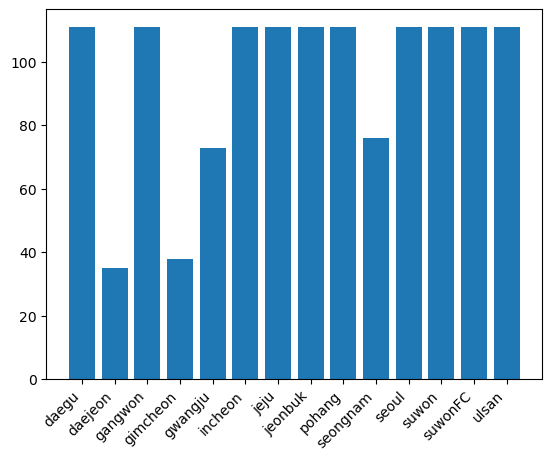

In [2]:
# 2021 ~ 2023 시즌 동안의 참여한 팀과 그 경기수 시각화

x = sorted(list(set(df['기준'].values)))
y = df['기준'].value_counts().sort_index()

plt.bar(x,y)
plt.xticks(rotation=45, ha='right') 
plt.show()


# 2021 ~ 2023 시즌 동안의 팀별 승리 수 시각화

21년 최다 승: 전북(우승), 22년 최다 승: 울산(우승), 23년 최다 승: 울산(우승 확정)

21년 최소 승: 강원, 광주(강등), 22년 최소 승: 김천(강등), 성남(강등), 23년 최소 승: 강원(강등권)

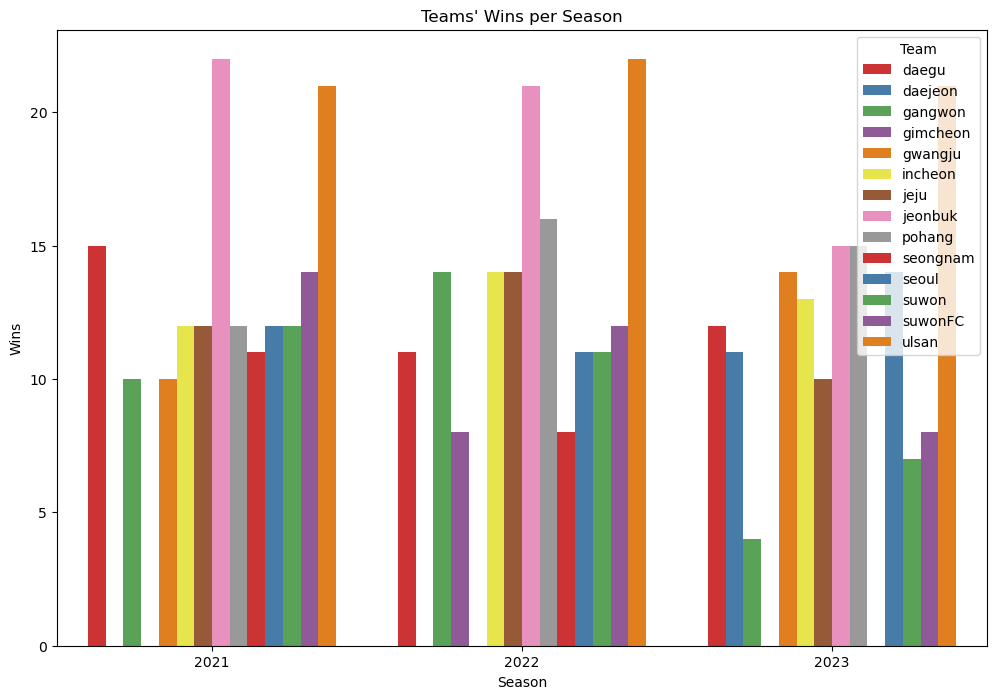

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 팀의 시즌별 승리 수 계산
team_season_wins = df[df['경기결과'] == 'W'].groupby(['기준', '시즌'])['경기결과'].count().reset_index()

# Seaborn을 사용한 팀별 시즌별 승리 수 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='경기결과', hue='기준', data=team_season_wins, palette=sns.color_palette("Set1"))
plt.title('Teams\' Wins per Season')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.legend(title='Team', loc='upper right')
plt.show()


# 2021~ 2023 시즌 동안의 팀별 패배 수 시각화

21년 최다 패: 광주(강등), 22년 최다 패: 성남(플레이 오프 강등), 23년 최다 패: 수원

21년 최소 패: 전북, 울산, 22년 최소 패: 울산, 23년 최소 패: 포항

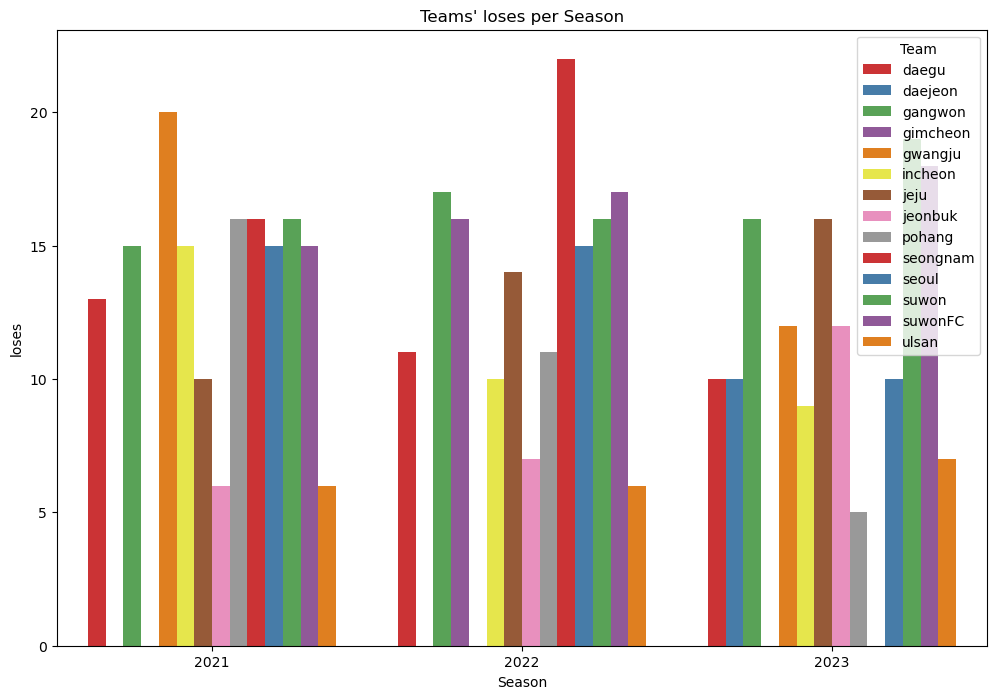

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 팀의 시즌별 패배 수 계산
team_season_wins = df[df['경기결과'] == 'L'].groupby(['기준', '시즌'])['경기결과'].count().reset_index()

# 팀별 시즌별 패배 수 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='경기결과', hue='기준', data=team_season_wins, palette=sns.color_palette("Set1"))
plt.title('Teams\' loses per Season')
plt.xlabel('Season')
plt.ylabel('loses')
plt.legend(title='Team', loc='upper right')
plt.show()


> 팀들의 승/패에 득점이 관련되어있다고 생각해서, 시즌별 팀들의 득점 수 시각화

# 2021 ~ 2023 시즌 동안의 참여한 팀들의 평균 득점수 시각화

21년 득점 1등: 전북, 22년 득점 1등: 울산, 23년 득점 1등: 서울

22년 득점 꼴등: 성남, 22년 득점 꼴등: 성남, 23년 득점 꼴등: 강원 

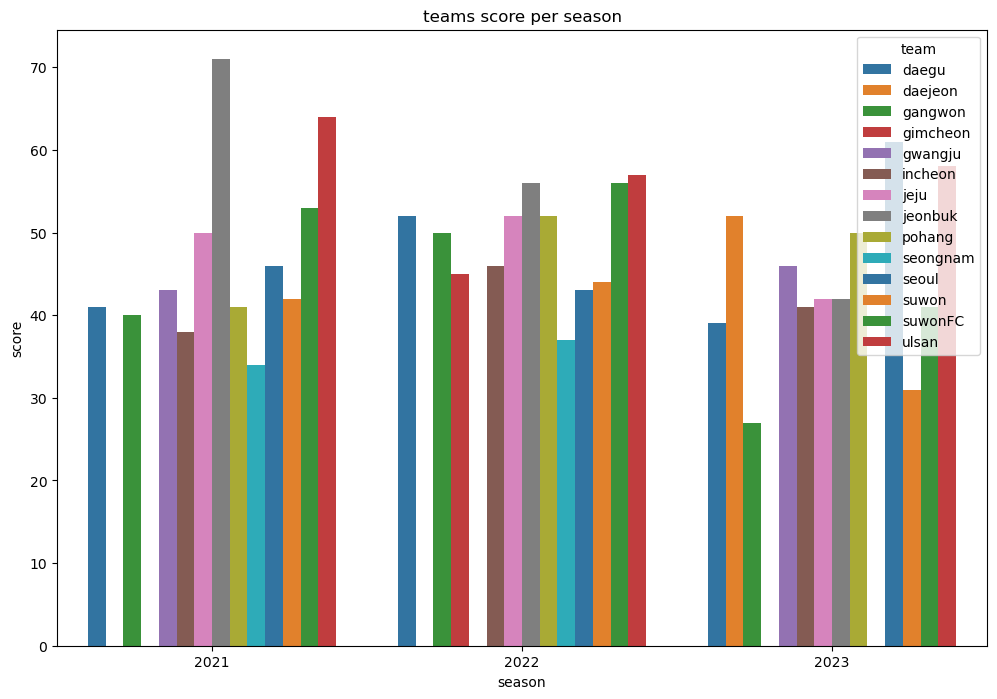

In [5]:
# 팀별 시즌별 평균 득점 데이터 추출
team_season_goals = df.groupby(['기준', '시즌'])['득점'].sum().reset_index()

# 시즌별 평균득점 수 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='득점', hue='기준', data=team_season_goals, palette=sns.color_palette())
plt.title('teams score per season')
plt.xlabel('season')
plt.ylabel('score')
plt.legend(title='team', loc='upper right')
plt.show()

- 23년 득점 1등은 울산이 아니라 서울인 점이 특이했음. 

- 울산은 2등

> 팀들의 승/패에 구단가치도 영향이 있을 수 있다고 생각해서 평균 구단 가치 시각화

# 2021 ~ 2023 시즌동안의 구단 평균 가치 시각화

21년 1등: 전북, 22년 1등: 울산, 23년 1등: 울산

21년 꼴등: 포항, 22년 꼴등: 대구, 23년 1등: 대구

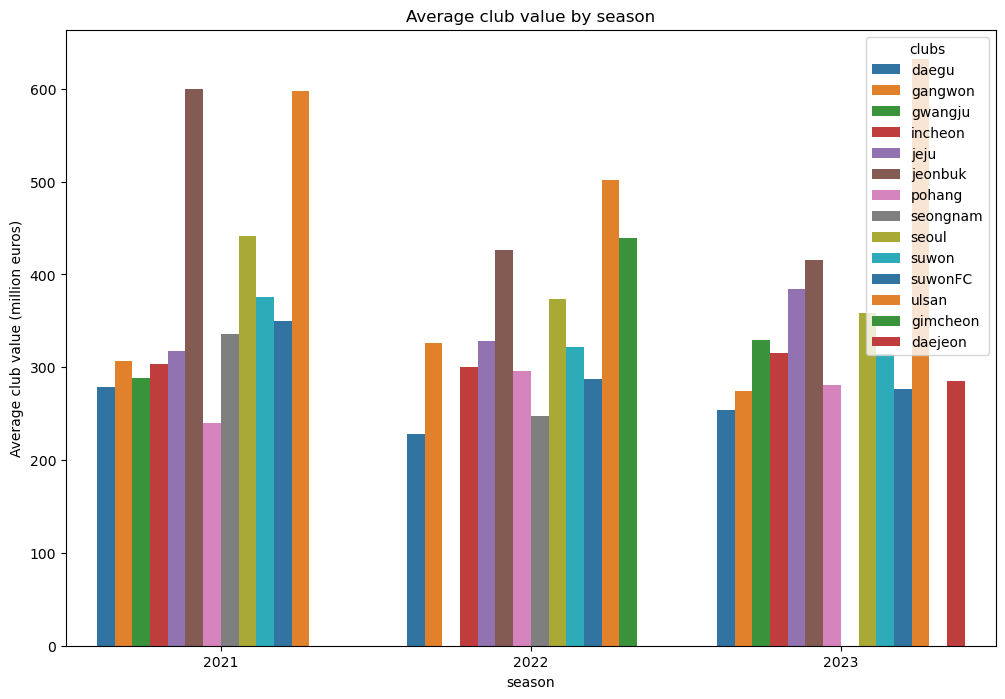

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시즌별 구단 평균 가치 데이터 추출
season_team_avg_value = df.groupby(['시즌', '기준'])['평균 가치'].mean().reset_index()

# 시즌별 구단 평균 가치 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='평균 가치', hue='기준', data=season_team_avg_value,palette=sns.color_palette())
plt.title('Average club value by season')
plt.xlabel('season')
plt.ylabel('Average club value (million euros)')
plt.legend(title='clubs', loc='upper right')
plt.show()

- 21년 구단가치 1등은 전북(우승)이지만, 꼴등은 포항은 21년 9등. 21년 강등팀 광주는 뒤에서 5등.

- 22년 구단가치 1등은 울산(우승)이었다. 꼴등인 대구는 22년 8등. 22년 강등팀 성남은 뒤에서 2등.

- 23년 구단가치 1등은 울산(우승)이었다. 꼴등은 대구는 23년 6등. 23년 최하위팀 수원은 약 6등.


-> 대구는 구단가치에 비해 성적을 잘 얻는 편이다. 23년 최하위팀인 수원은 이례적이다.

# 2021 ~ 2023 시즌 동안의 팀별 슈팅 수 시각화

21년 슈팅 수 1등: 광주 22년 슈팅 수 1등:제주 23년 슈팅 수 1등: 서울

21년 슈팅 수 꼴등: 인천 22년 슈팅 수 꼴등:강원 23년 슈팅 수 꼴등: 강원

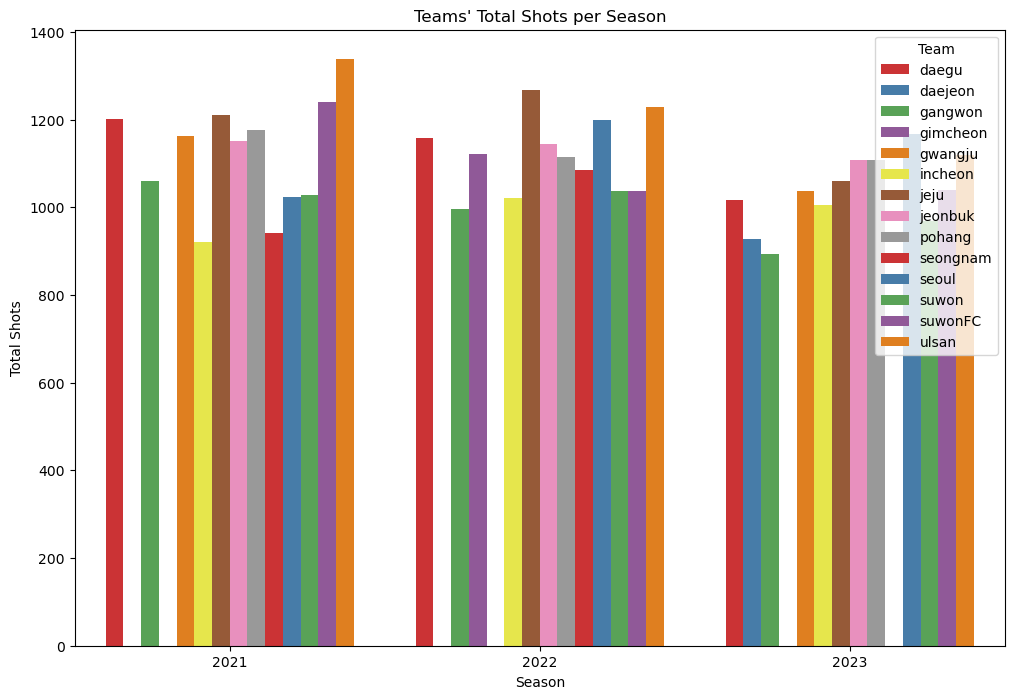

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 팀의 시즌 별 총 슈팅 수 계산
team_season_shots = df.groupby(['기준', '시즌'])[['슈팅', '유효 슈팅', '블락된슈팅', '벗어난슈팅', 'PA내 슈팅']].sum().reset_index()
team_season_shots['총 슈팅'] = team_season_shots[['슈팅', '유효 슈팅', '블락된슈팅', '벗어난슈팅', 'PA내 슈팅']].sum(axis=1)

# 팀의 시즌 별 총 슈팅 수 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='시즌', y='총 슈팅', hue='기준', data=team_season_shots, palette=sns.color_palette("Set1"))
plt.title('Teams\' Total Shots per Season')
plt.xlabel('Season')
plt.ylabel('Total Shots')
plt.legend(title='Team', loc='upper right')
plt.show()


- 21년 슈팅 수 1등인 울산은 리그 2등, 리그 1등이었던 전북은 3등. 강등한 광주의 슈팅 수는 6등이었으며, 인천과 성남이 최하위권이었다.

- 22년 슈팅수 1등인 전북은 리그 2등, 리그 1등이었던 울산은 2등. 강등한 성남과 김천상무의 슈팅 수는 각각 6등, 8등이었으며, 강원과 인천이 최하위권이었다.

- 23년 슈팅 수 1등은 서울(득점 수 1등), 리그 1등인 울산은 2등. 강등권인 수원과 강원은 각각 중위권, 최하위이다.

## 감사합니다.


- 홈 팀 관련 변수들의 상관관계 분석

C:\Users\HONG\AppData\Local\Temp\ipykernel_10416\2713774770.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_df[['홈 득점', '홈 도움', '홈 슈팅', '홈 유효 슈팅', '홈 블락된슈팅', '홈 벗어난슈팅',
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


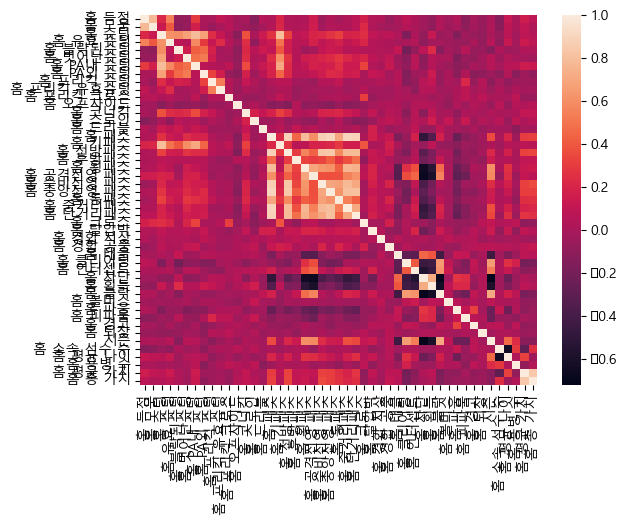

In [17]:
import seaborn as sns
# import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'Malgun Gothic'
H_corr = new_df[['홈 득점', '홈 도움', '홈 슈팅', '홈 유효 슈팅', '홈 블락된슈팅', '홈 벗어난슈팅',
       '홈 PA내 슈팅', '홈 PA외 슈팅', '홈 프리킥 슈팅', '홈 프리킥 유효슈팅', '홈 프리킥 크로스',
       '홈 오프사이드', '홈 코너킥', '홈 스로인', '홈 드리블', '홈 패스', '홈 키패스', '홈 전방패스',
       '홈 후방패스', '홈 횡패스', '홈 공격진영 패스', '홈 수비진영 패스', '홈 중앙진영 패스', '홈 롱패스',
       '홈 중거리패스', '홈 단거리패스', '홈 크로스', '홈 탈압박', '홈 경합 지상', '홈 경합 공중', '홈 태클',
       '홈 클리어링', '홈 인터셉트', '홈 차단', '홈 획득', '홈 블락', '홈 볼미스', '홈 파울', '홈 피파울',
       '홈 경고', '홈 퇴장', '홈 팀', '시즌', '홈 경기결과', '홈 소속 선수 수', '홈 평균 나이', '홈 용병 수',
       '홈 평균 가치', '홈 총 가치',]].corr()
sns.heatmap(H_corr, xticklabels=H_corr.columns, yticklabels=H_corr.columns)
plt.show()

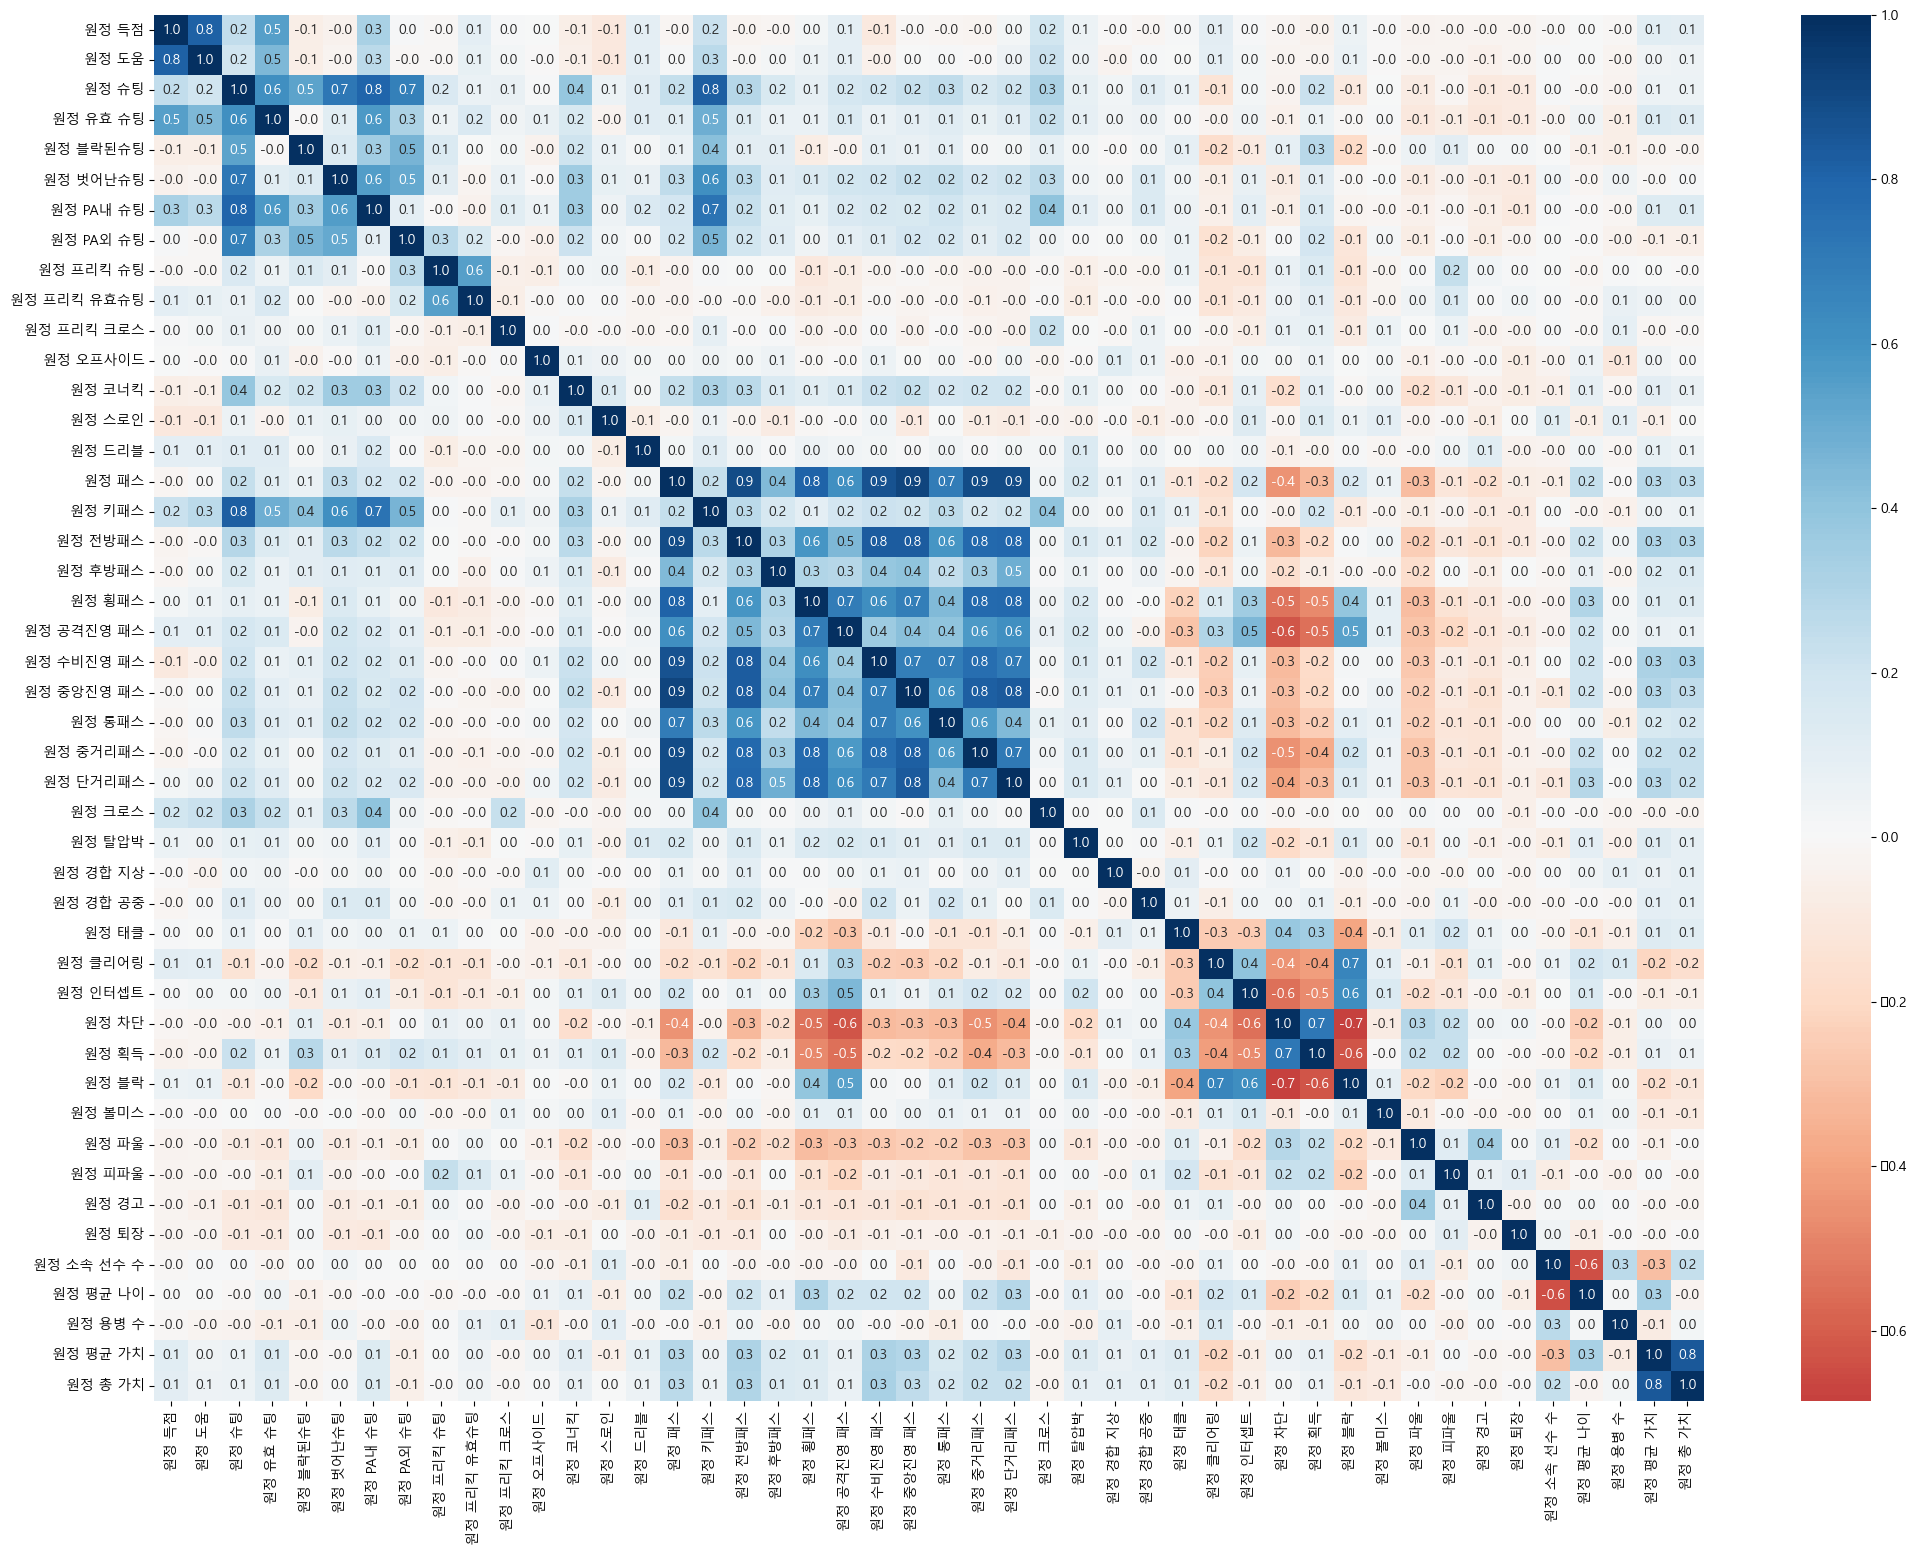

In [26]:
# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(25, 18)
sns.heatmap(H_corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

- 원정 팀관련 변수들의의 상관관계 분석

C:\Users\HONG\AppData\Local\Temp\ipykernel_10416\630096105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  A_corr = new_df[['원정 득점', '원정 도움', '원정 슈팅', '원정 유효 슈팅', '원정 블락된슈팅',
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\HONG\miniconda3\envs\data\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


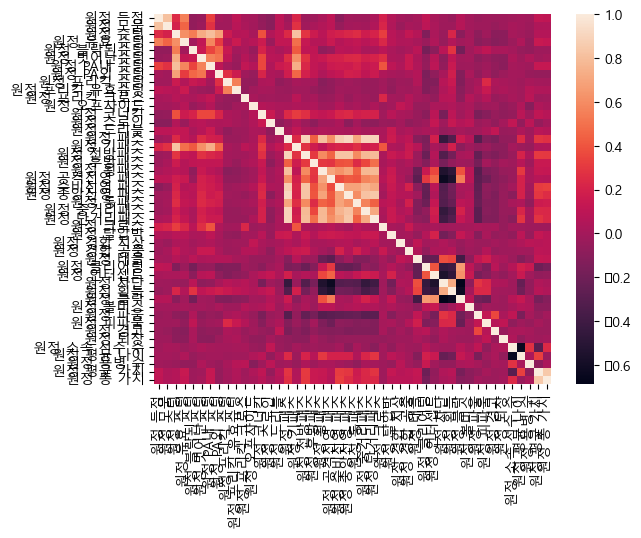

In [22]:
A_corr = new_df[['원정 득점', '원정 도움', '원정 슈팅', '원정 유효 슈팅', '원정 블락된슈팅',
       '원정 벗어난슈팅', '원정 PA내 슈팅', '원정 PA외 슈팅', '원정 프리킥 슈팅', '원정 프리킥 유효슈팅',
       '원정 프리킥 크로스', '원정 오프사이드', '원정 코너킥', '원정 스로인', '원정 드리블', '원정 패스',
       '원정 키패스', '원정 전방패스', '원정 후방패스', '원정 횡패스', '원정 공격진영 패스', '원정 수비진영 패스',
       '원정 중앙진영 패스', '원정 롱패스', '원정 중거리패스', '원정 단거리패스', '원정 크로스', '원정 탈압박',
       '원정 경합 지상', '원정 경합 공중', '원정 태클', '원정 클리어링', '원정 인터셉트', '원정 차단', '원정 획득',
       '원정 블락', '원정 볼미스', '원정 파울', '원정 피파울', '원정 경고', '원정 퇴장', '원정 팀',
       '원정 경기결과', '원정 소속 선수 수', '원정 평균 나이', '원정 용병 수', '원정 평균 가치', '원정 총 가치']].corr()
sns.heatmap(A_corr, xticklabels=A_corr.columns, yticklabels=H_corr.columns)
plt.show()

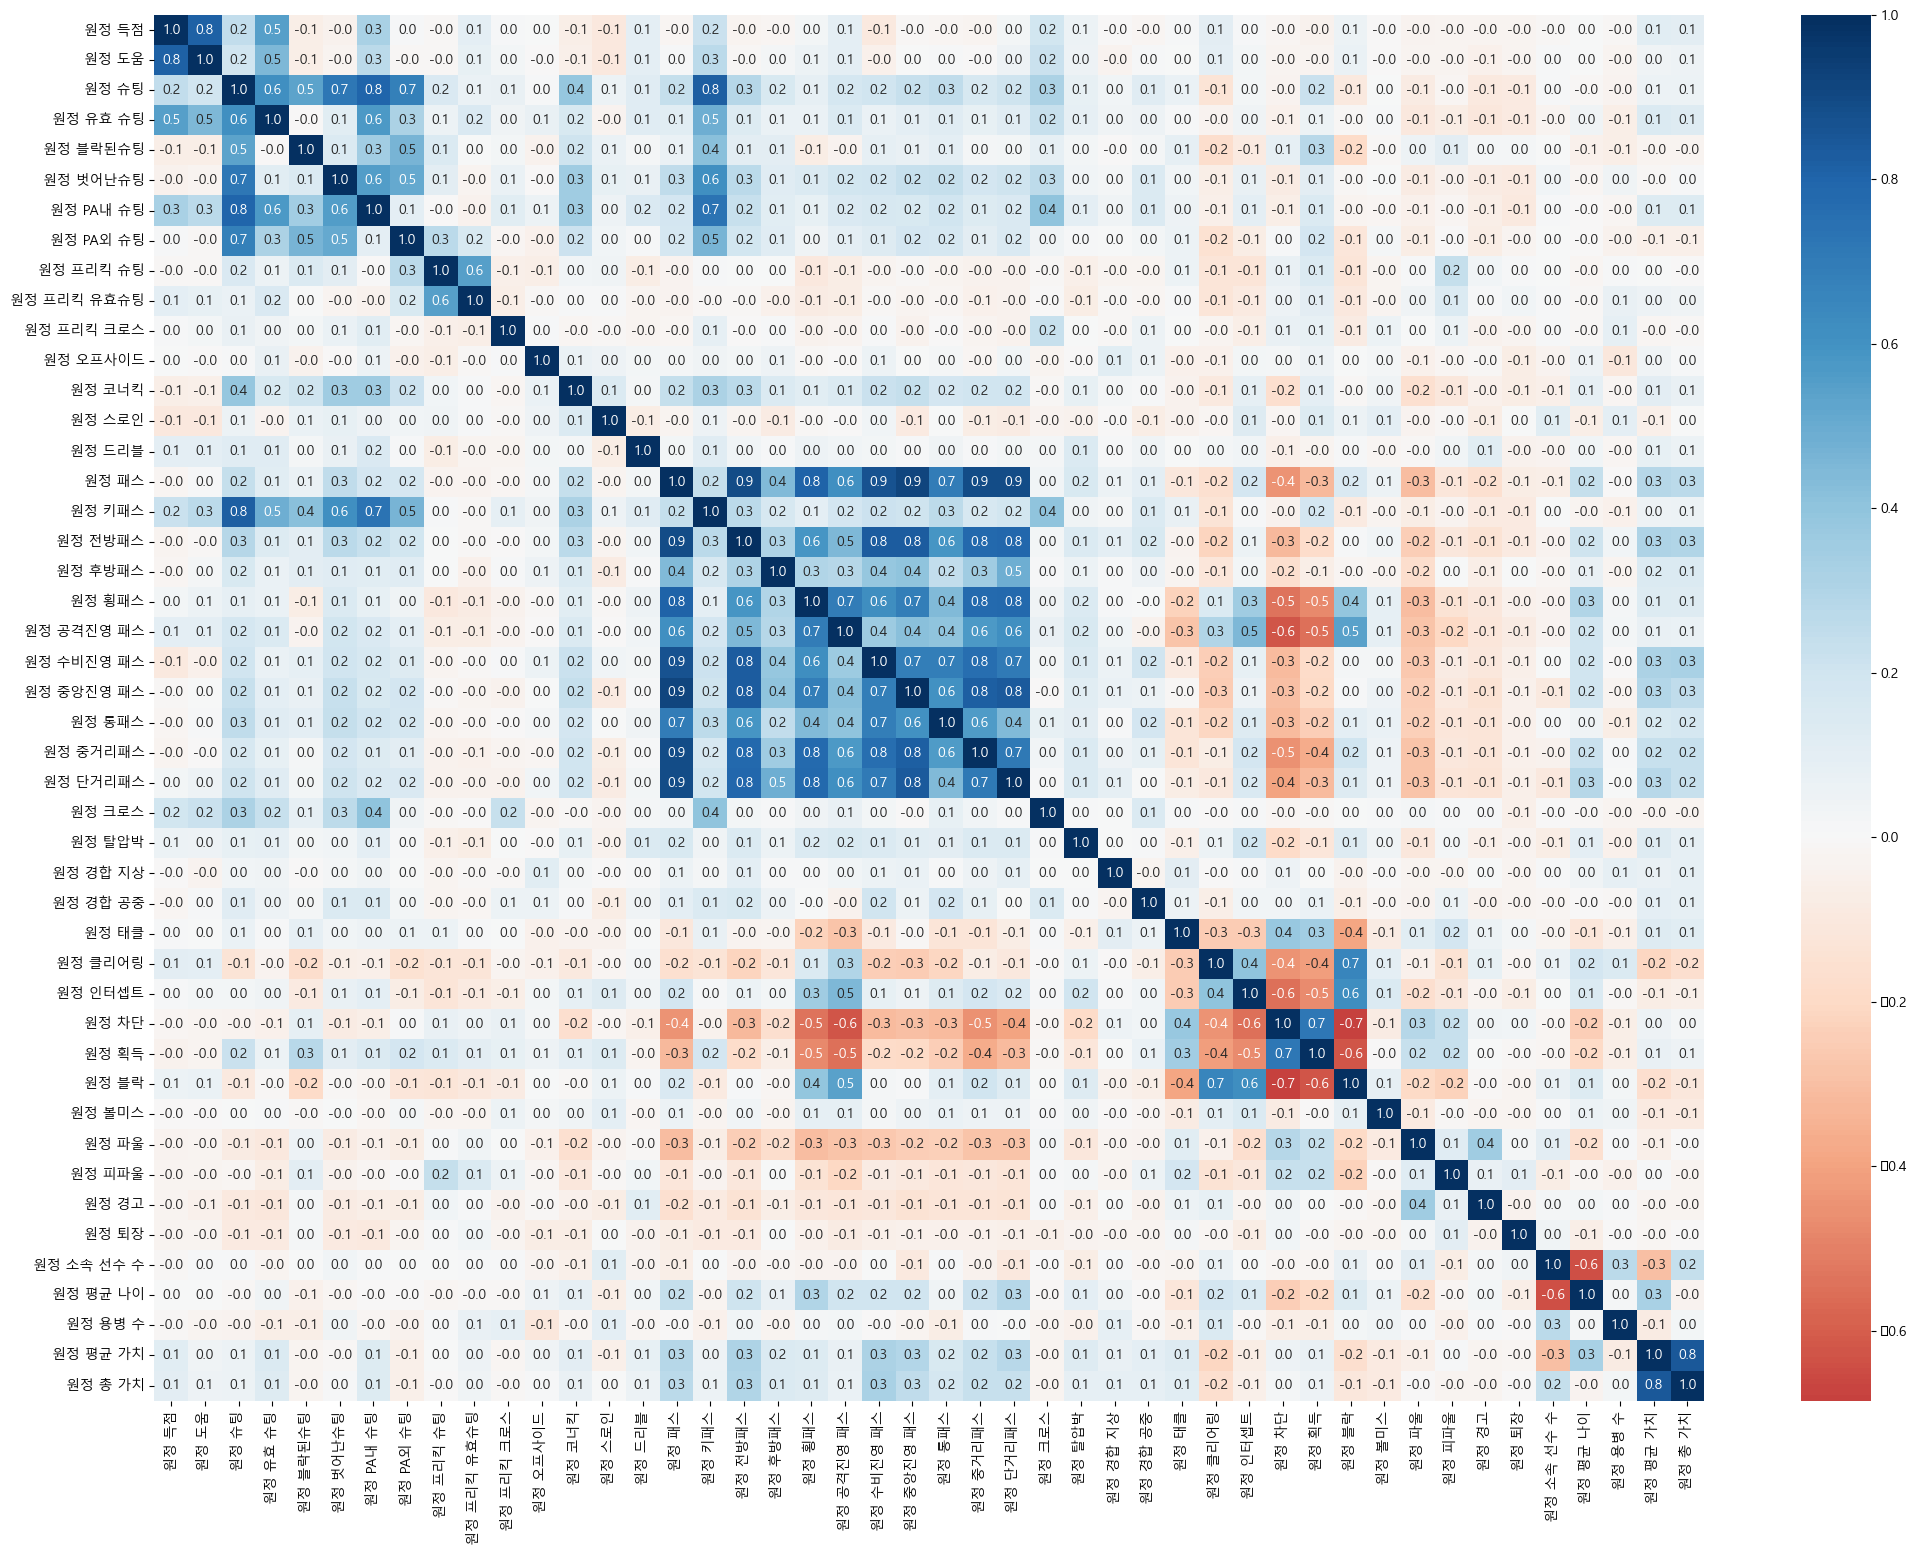

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 18)
sns.heatmap(A_corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()